In [5]:
%pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import xarray as xr

In [6]:
ds = xr.open_dataset("/home/medico_eafit/WORKSPACES/sebastian_carmona/data/EAFIT/Dataset1/LiMon_Raw_Data_cc/2023/01/31/LPP/L2.nc", engine='netcdf4')

In [7]:
ds

<xarray.Dataset> Size: 27MB
Dimensions:              (time: 52, channels: 4, range: 16380)
Coordinates:
  * range                (range) float64 131kB 1.875 5.625 ... 6.142e+04
Dimensions without coordinates: time, channels
Data variables: (12/15)
    Raw_Lidar_Data       (time, channels, range) float64 27MB ...
    Raw_Data_Start_Time  (time) datetime64[ns] 416B ...
    Raw_Data_Stop_Time   (time) datetime64[ns] 416B ...
    Wavelengths          (channels) int32 16B ...
    Polarization         (channels) |S1 4B ...
    DAQ_Range            (channels) float64 32B ...
    ...                   ...
    Zenith               (time) float64 416B ...
    Azimuth              (time) float64 416B ...
    ADC_Bits             (channels) int32 16B ...
    Laser_Source         (channels) int32 16B ...
    nBins_Ch             (channels) int32 16B ...
    File_Names           (time) <U113 24kB ...
Attributes:
    Site_Name:               Medellin
    Altitude_meter_asl:      1495.0
    Latitude_degrees_north:  -75.6
    Longitude_degrees_east:  6.2
    Range_Resolution:        3.75
    Laser_Frec_1:            20.0
    Laser_Frec_2:            20.0

In [4]:
ds.Accumulated_Pulses.values

array([-28208761,       601,       601,       601])

In [5]:
ds.DAQ_Range.values

array([1.18043428e-310, 1.00000000e-001, 5.00000000e+002, 5.00000000e-001])

In [6]:
ds.Zenith.values

# Corregir el ángulo de disparo.

array([90.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [5]:
import netCDF4 as nc

ncfile = nc.Dataset('/home/medico_eafit/WORKSPACES/sebastian_carmona/data/EAFIT/Dataset1/LiMon_Raw_Data_cc/2023/01/31/LPP/L2.nc')
global_attributes = {attr: ncfile.getncattr(attr) for attr in ncfile.ncattrs()}
global_attributes["Longitude_degrees_east"]


6.2

In [10]:
# Lista los grupos en el archivo
print(ncfile.groups)

# Accede a un grupo específico
group = ncfile.groups['L2_Data']

# Lista las variables en el grupo
print(group.variables)

# Carga el grupo como un conjunto de datos xarray
ds_group = xr.open_dataset(xr.backends.NetCDF4DataStore(group))
print(ds_group)

{'L1_Data': <class 'netCDF4._netCDF4.Group'>
group /L1_Data:
    indxChannel_for_Cloud_Mask: 0
    num_Points_Bkg: 2000
    Averaged_Profiles_L1: 10
    avg_Points_Cloud_Mask: 1
    dimensions(sizes): time(5), channels(4), range(16380)
    variables(dimensions): float64 Raw_Lidar_Data_L1(time, channels, range), int32 Start_Time_AVG_L1(time), int32 Stop_Time_AVG_L1(time), float64 Azimuth_AVG_L1(time), float64 Zenith_AVG_L1(time), int32 Laser_Zero_Bin_Offset(channels), float64 MaxRangeAnalysis(time), float64 Temperature_K(range), float64 Pressure_Pa(range), float64 Temperature_Ground_Level(time), float64 Pressure_Ground_Level(time), float64 range(range), int32 Cloud_Mask(time, range)
    groups: , 'L2_Data': <class 'netCDF4._netCDF4.Group'>
group /L2_Data:
    indxChannel_for_Fernald_inv: 0
    Wavelength_Inverted: 532
    Averaged_Profiles_L2: 10
    R_Ref: 1.0
    dimensions(sizes): time(5), lrs(5), range(16380), channels(4)
    variables(dimensions): float64 Aerosol_Extinction(time, l

In [71]:
ds_group.Start_Time_AVG_L2.values

array(['2023-01-31T18:51:32.000000000', '2023-01-31T18:56:33.000000000',
       '2023-01-31T19:01:35.000000000', '2023-01-31T19:06:36.000000000',
       '2023-01-31T19:22:23.000000000'], dtype='datetime64[ns]')

In [92]:
import numpy as np

start_time = ds_group.Start_Time_AVG_L2.values.astype('float32') // 10**9
stop_time = ds_group.Stop_Time_AVG_L2.values

avg_time = (start_time + stop_time) / 2

datetime_ns = np.array(avg_time, dtype='datetime64[s]')
datetime_ns = datetime_ns.astype('datetime64[ns]') 
datetime_ns

array(['2023-01-31T18:53:36.000000000', '2023-01-31T18:59:32.000000000',
       '2023-01-31T19:04:21.000000000', '2023-01-31T19:14:31.000000000',
       '2023-01-31T19:25:26.000000000'], dtype='datetime64[ns]')

In [107]:
ds_group.Start_Time_AVG_L2.values, np.array(ds_group.Stop_Time_AVG_L2.values, dtype='datetime64[s]')

(array(['2023-01-31T18:51:32.000000000', '2023-01-31T18:56:33.000000000',
        '2023-01-31T19:01:35.000000000', '2023-01-31T19:06:36.000000000',
        '2023-01-31T19:22:23.000000000'], dtype='datetime64[ns]'),
 array(['2023-01-31T18:56:33', '2023-01-31T19:01:34',
        '2023-01-31T19:06:36', '2023-01-31T19:22:22',
        '2023-01-31T19:28:09'], dtype='datetime64[s]'))

In [100]:
ds = ds_group.assign_coords(time=datetime_ns)
ds.time

<xarray.DataArray 'time' (time: 5)> Size: 40B
array(['2023-01-31T18:53:36.000000000', '2023-01-31T18:59:32.000000000',
       '2023-01-31T19:04:21.000000000', '2023-01-31T19:14:31.000000000',
       '2023-01-31T19:25:26.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 40B 2023-01-31T18:53:36 ... 2023-01-31T19:...

Text(0.5, 1.0, 'Aerosol Extinction')

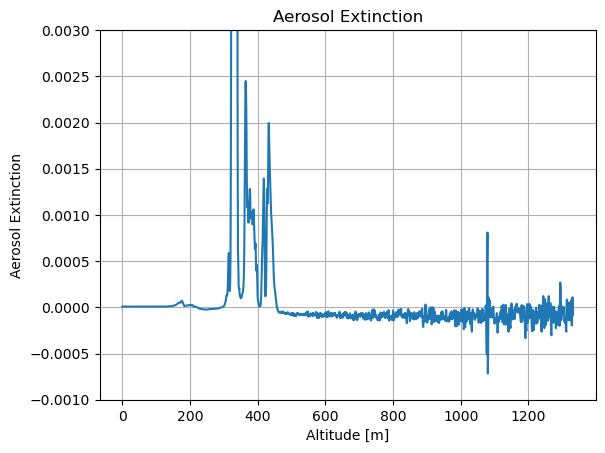

In [76]:
import matplotlib.pyplot as plt

plt.plot(ds_group.sel(range=slice(0,5000)).Aerosol_Extinction.values[9,0,:])

plt.ylim([-0.001, 0.003])

plt.grid()
plt.xlabel("Altitude [m]")
plt.ylabel("Aerosol Extinction")
plt.title("Aerosol Extinction")

In [11]:
ds_group.Ref_Range_ASL_m.values

array([14207.5 , 10138.75, 11350.  , 11477.5 , 10926.25, 11608.75,
       11612.5 , 12977.5 , 10356.25, 11158.75, 10611.25, 11995.  ,
       10491.25, 11518.75, 12520.  ])

In [58]:
ds_group.Range_Corrected_Lidar_Signal_L2.sel(channels=0).time

<xarray.DataArray 'time' (time: 15)>
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14], dtype=int64)
Dimensions without coordinates: time

In [47]:
data_to_plot = ds_group.Range_Corrected_Lidar_Signal_L2.sel(channels=0, range=slice(0, 10000))

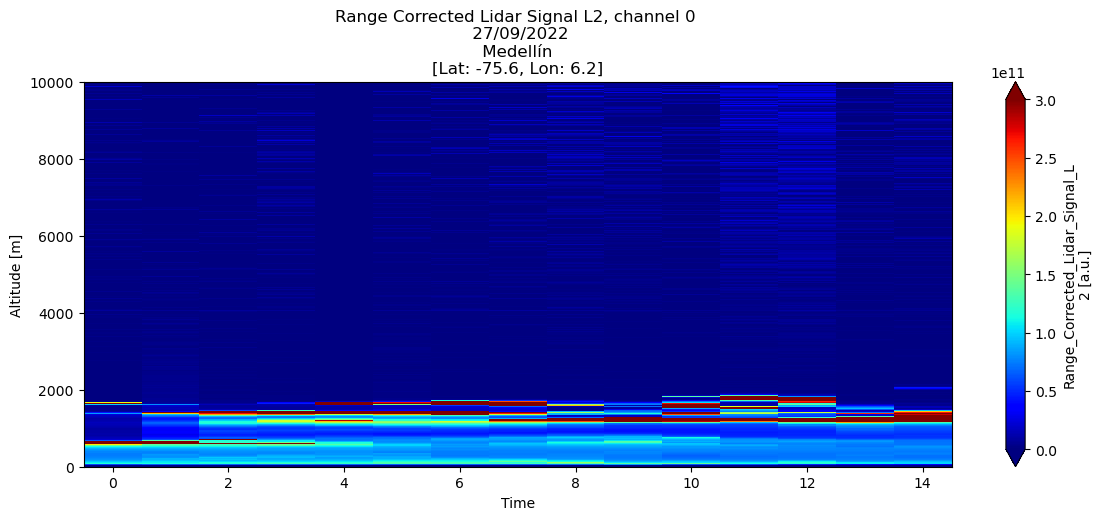

In [91]:
# Define el tamaño de la figura con una relación de aspecto de 16:9
fig, ax = plt.subplots(figsize=(14, 5))  # Aquí 16 y 9 son las proporciones de ancho y alto

# Realiza la visualización con pcolormesh
mesh = data_to_plot.plot.pcolormesh(
    x="time", 
    cmap='jet', 
    vmin=0, 
    vmax=3e11, 
    ax=ax,
    add_colorbar=True  # Agrega una barra de color
)

# Obtén el nombre de la variable graficada
variable_name = data_to_plot.name

# Personalización adicional de la gráfica
ax.set_title(f"Range Corrected Lidar Signal L2, channel 0 \n 27/09/2022\n Medellín \n[Lat: {ds.attrs['Latitude_degrees_north']}, Lon: {ds.attrs['Longitude_degrees_east']}]")
ax.set_xlabel('Time')
ax.set_ylabel('Altitude [m]')

plt.show()

In [71]:
ds.Raw_Data_Stop_Time.values

array(['2022-09-27T20:48:31.000000000', '2022-09-27T20:49:01.000000000',
       '2022-09-27T20:49:31.000000000', '2022-09-27T20:50:01.000000000',
       '2022-09-27T20:50:31.000000000', '2022-09-27T20:51:01.000000000',
       '2022-09-27T20:51:31.000000000', '2022-09-27T20:52:02.000000000',
       '2022-09-27T20:52:32.000000000', '2022-09-27T20:53:02.000000000',
       '2022-09-27T20:53:32.000000000', '2022-09-27T20:54:02.000000000',
       '2022-09-27T20:54:32.000000000', '2022-09-27T20:55:02.000000000',
       '2022-09-27T20:55:32.000000000', '2022-09-27T20:56:32.000000000',
       '2022-09-27T20:57:03.000000000', '2022-09-27T20:57:33.000000000',
       '2022-09-27T20:58:03.000000000', '2022-09-27T20:58:33.000000000',
       '2022-09-27T20:59:03.000000000', '2022-09-27T20:59:33.000000000',
       '2022-09-27T21:00:03.000000000', '2022-09-27T21:00:33.000000000',
       '2022-09-27T21:01:03.000000000', '2022-09-27T21:01:33.000000000',
       '2022-09-27T21:02:04.000000000', '2022-09-27

In [55]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Supongamos que ds_group es tu Dataset de xarray
# Raw_Data_Start_Time y Raw_Data_Stop_Time deben estar en formato datetime

# Ejemplo de tiempos de inicio y fin
Raw_Data_Start_Time = pd.to_datetime("2023-07-15 08:00:00")
Raw_Data_Stop_Time = pd.to_datetime("2023-07-15 08:14:00")

# Número de puntos en el eje temporal
num_time_points = ds_group.time.size

# Generar una lista de tiempos interpolados
time_array = pd.date_range(start=Raw_Data_Start_Time, end=Raw_Data_Stop_Time, periods=num_time_points)

# Asignar la lista de tiempos interpolados a la variable 'time' en el dataset
ds_group = ds_group.assign_coords(time=time_array)

# Selecciona el rango y canal deseado
data_to_plot = ds_group.Range_Corrected_Lidar_Signal_L2.sel(channels=0, range=slice(0, 10000))

# Define el tamaño de la figura con una relación de aspecto de 16:9
fig, ax = plt.subplots(figsize=(11, 5))  # Tamaño ajustado a 11:5

# Realiza la visualización con pcolormesh
mesh = data_to_plot.plot.pcolormesh(
    x="time", 
    cmap='jet', 
    vmin=0, 
    vmax=3e11, 
    ax=ax,
    add_colorbar=True  # Agrega una barra de color
)

# Formato del eje x a HH:MM
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Ajuste de las etiquetas del eje x para una mejor legibilidad
fig.autofmt_xdate()

# Obtén el nombre de la variable graficada
variable_name = data_to_plot.name

# Personalización adicional de la gráfica
ax.set_title(f'Range Corrected Lidar Signal L2 - {variable_name}')
ax.set_xlabel('Time (HH:MM)')
ax.set_ylabel('Altitude [m]')

plt.show()



<xarray.DataArray 'time' (time: 15)>
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14], dtype=int64)
Dimensions without coordinates: time


TypeError: can only decode Dataset or DataStore objects